## Prior

A representation of our belief about the hypothesis. How can it affect our result (posterior) ?
Let's find out!

### Coin Problem

Lets say, your close friend who has a biased coin that returns Head 70% of the time. He comes to you with a random coin and
bets you some money that the coin would be head, you don't know if the coin is fair or not. Now, he says you can do 5 flips to judge whether the coin is fair or not.

In [11]:
%matplotlib inline
from thinkbayes2 import Suite
import thinkplot

The Suite Class extends the Pmf class and encapsulates the update Framework, which in short mean that you don't have to write the *update* function anymore.

**Update Framework**

The update framework, takes your prior and multiplies it with the likelihood of the hypothesis given the data, which is 
equal to 
    
        P(Data)*P(Hypothesis|Data)

performing a bayesian update. We have encapsulated it in the Suite Class, so from now on we will only be focusing on the likelihood function, which calculates by how much you should update your prior.

We have 2 hypothesis in this problem statement 

1. The coin is fair
2. The coin is based

what will be the likelihood function to figure out whether the coin is fair or not ?

Lets, boil the problem down

In [6]:
class Coin(Suite):
    
    def Likelihood(self, data, hypo):
        x = hypo / 100
        if data == 'H':
            return x
        else:
            return 1 - x

In [7]:
coin_suite = Coin(range(101))

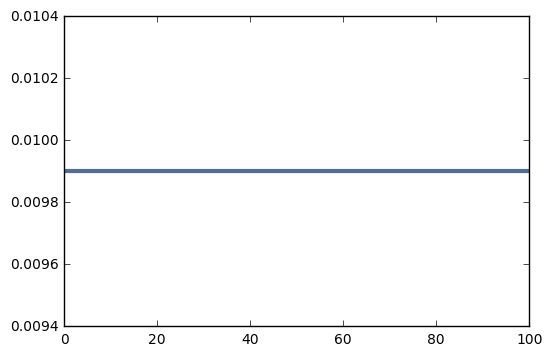

In [12]:
thinkplot.Pdf(coin_suite)

In [66]:
coin_suite.UpdateSet(['HHTTH'])

0.34403093085901948

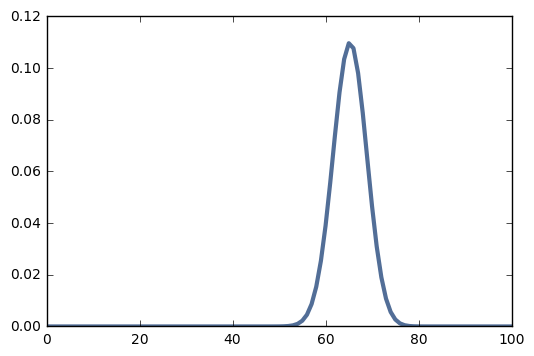

In [67]:
thinkplot.Pdf(coin_suite)

Let's say we know our friend is mischievous and we believe that there is a 60% - 80% chance that the coin is biased

In [82]:
# Lets reinitialize and set our prior according to our belief
coin_suite = Coin(range(101))
from scipy.stats import norm

prior = norm.pdf(range(101), loc=60, scale=10)
for index in range (101):
    coin_suite[index] = prior[index]
coin_suite.Normalize()

0.9999745744202837

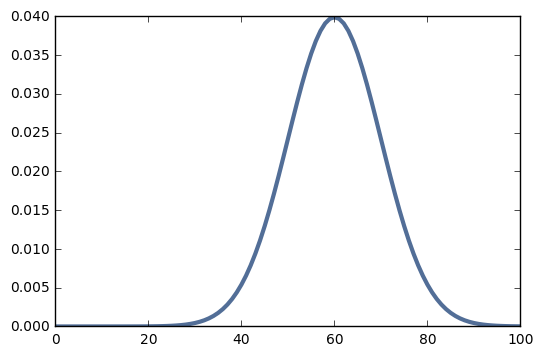

In [83]:
thinkplot.Pdf(coin_suite)

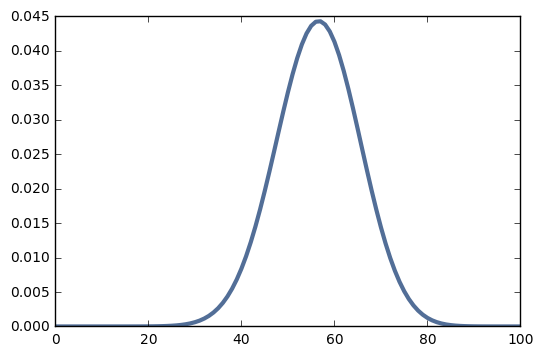

In [84]:
coin_suite.UpdateSet('HTTHT')
thinkplot.Pdf(coin_suite)

In [85]:
coin_suite.Mean()

56.425364973908046

In [86]:
coin_suite.MaximumLikelihood()

57

In [87]:
coin_suite.Median()

56

In [88]:
coin_suite.CredibleInterval(90)

(42, 71)